The tumor has a size of  46.34040000000001 cm²


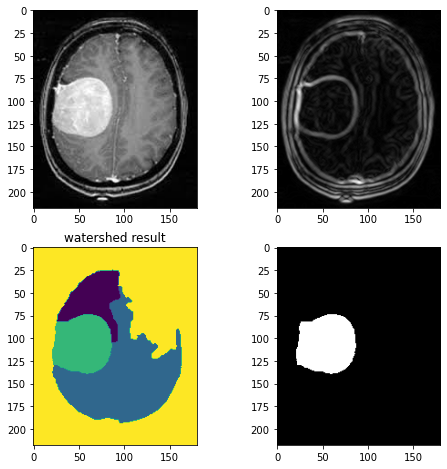

In [51]:
from skimage.io import imread,imshow
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from matplotlib import cm
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.segmentation import mark_boundaries, watershed
from skimage.feature import peak_local_max

%matplotlib inline

im_rgb = imread('mri_brain.jpg')

im = (rgb2gray(im_rgb)*255).astype(np.uint8)

smoothing_factor = 3

# Compute the gradients of the image an the :
gradient = skr.gradient(skr.mean(im, disk(smoothing_factor)), disk(1))

markers_coordinates_auto = peak_local_max(gradient.max()-gradient, min_distance = 50, num_peaks = 10)


#image containing only the markors and their corresponding labels. 
markers = np.zeros_like(im)
for i,(row,col) in enumerate(markers_coordinates_auto):
    markers[row,col] = i+1

ws = watershed(gradient, markers)

#selection of the lable representing the tumor (supposed to have the highest mean value)
highest_mean = 0
label = 0

for i in range(1,markers_coordinates_auto.shape[0]+1) : 
    sum_val = 0
    num_pix = 0
    for a in range(im.shape[0]): 
        for b in range(im.shape[1]) : 
            if ws[a,b] == i : 
                sum_val += im[a,b]
                num_pix += 1 
                
    mean = sum_val/num_pix
    
    if mean > highest_mean : 
        highest_mean = mean
        label = i
        
#computation of the binary segmentation image of the tumor        
        
seg = 1*(ws==label)

#computation of the tumor size. 

n_pix = 0

for i in range(seg.shape[0]) : 
    for j in range(seg.shape[1]) : 
        if seg[i,j] == 1 : 
            n_pix +=1
            
tumor_size = n_pix*0.115*0.115

print('The tumor has a size of ', tumor_size, 'cm²')

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.imshow(im,cmap=plt.cm.gray);
plt.subplot(2,2,2)
plt.imshow(gradient,cmap=plt.cm.gray);
plt.subplot(2,2,3)
plt.imshow(ws);
plt.title('watershed result')
plt.subplot(2,2,4)
plt.imshow(seg, cmap = plt.cm.gray)


In [44]:
print(markers_coordinates_auto.shape)

(4, 2)


In [ ]:
highest_mean = 0
label = 0

for i in enumerate(markers_coordinates_auto) : 
    sum_val = 0
    num_pix = 0
    for a in im.shape[0] : 
        for b in im.shape[1] : 
            if ws[a,b] == i+1 : 
                sum_val += im[a,b]
                num_pix += 1 
                
    mean = sum_val/num_pix
    
    if mean > highest_mean : 
        highest_mean = mean
        lable = i
